In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Задание 1

In [ ]:
result_mpi = pd.read_csv("result.csv")
#result_seq = pd.read_csv("result_seq.csv")

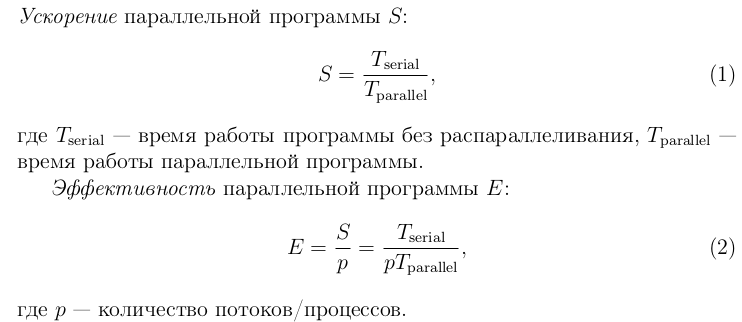

In [ ]:
result_mpi.head()

,MPI_processes,Total_trials,Points_inside,Ratio,Estimated_pi,Absolute_error,Execution_time
0,1,1000,787,0.787,3.148,0.006407,0.000025
1,2,1000,769,0.769,3.076,0.065593,0.000022
2,3,1000,804,0.804,3.216,0.074407,0.000018
3,4,1000,792,0.792,3.168,0.026407,0.000031
4,5,1000,768,0.768,3.072,0.069593,0.000032


In [ ]:
result_seq = result_mpi[result_mpi['MPI_processes'] == 1]

In [ ]:
trials_values = [1000,  2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]
result_mpi['Speedup'] = 0
result_mpi['Efficiency'] = 0
for trials in trials_values:
    sequential_time = result_seq[result_seq['Total_trials'] == trials]['Execution_time']
    seq_time = sequential_time.values[0]
    result_mpi.loc[result_mpi['Total_trials'] == trials, 'Speedup'] = seq_time / result_mpi.loc[result_mpi['Total_trials'] == trials, 'Execution_time']

result_mpi['Efficiency'] = result_mpi['Speedup']/result_mpi['MPI_processes']

/tmp/ipython-input-1598658480.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.         1.13636364 1.38888889 0.80645161 0.78125    0.86206897]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result_mpi.loc[result_mpi['Total_trials'] == trials, 'Speedup'] = seq_time / result_mpi.loc[result_mpi['Total_trials'] == trials, 'Execution_time']


In [ ]:
result_mpi.head()

,MPI_processes,Total_trials,Points_inside,Ratio,Estimated_pi,Absolute_error,Execution_time,Speedup,Efficiency
0,1,1000,787,0.787,3.148,0.006407,0.000025,1.000000,1.000000
1,2,1000,769,0.769,3.076,0.065593,0.000022,1.136364,0.568182
2,3,1000,804,0.804,3.216,0.074407,0.000018,1.388889,0.462963
3,4,1000,792,0.792,3.168,0.026407,0.000031,0.806452,0.201613
4,5,1000,768,0.768,3.072,0.069593,0.000032,0.781250,0.156250


Построим график зависимости времени выполнения программы от количества процессов.

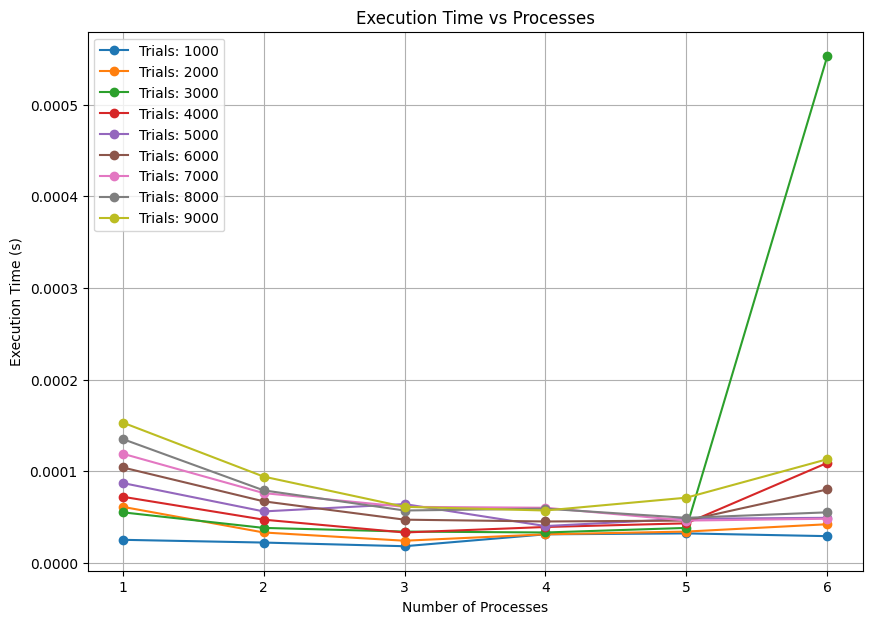

In [ ]:
plt.figure(figsize=(10, 7))
for i in range (len(trials_values)):
  filtered_data = result_mpi[result_mpi['Total_trials'] == trials_values[i]]
  plt.plot(filtered_data['MPI_processes'] , filtered_data['Execution_time'], marker='o', label=f'Trials: {trials_values[i]}')
  plt.xlabel('Number of Processes')
  plt.ylabel('Execution Time (s)')
  plt.title('Execution Time vs Processes')
  plt.legend()
  plt.grid(True)

In [ ]:
result_mpi.drop(result_mpi[result_mpi['MPI_processes'] == 1].index, inplace=True)

Построим график зависимости ускорения от количества процессов.

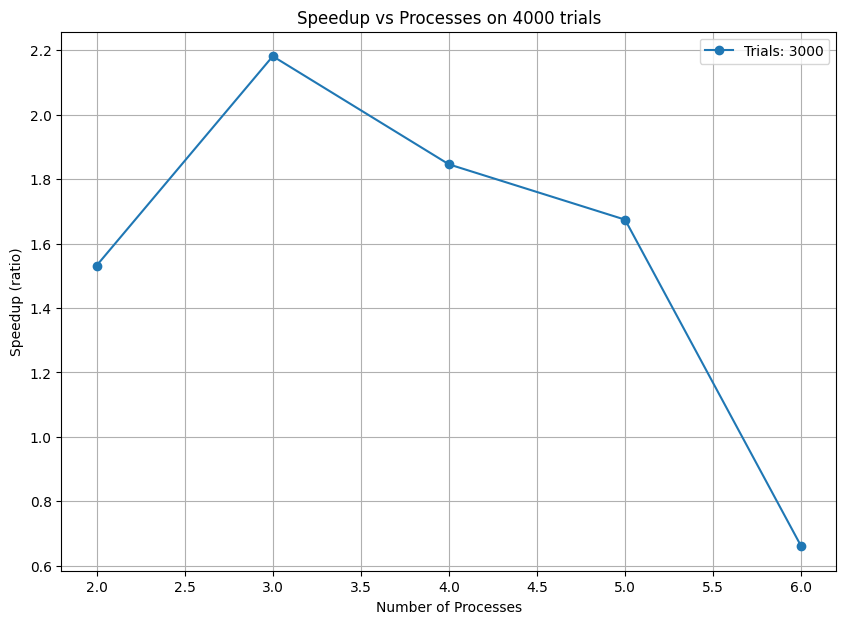

In [ ]:
plt.figure(figsize=(10, 7))
filtered_data = result_mpi[result_mpi['Total_trials'] == 4000]
plt.plot(filtered_data['MPI_processes'] , filtered_data['Speedup'], marker='o', label=f'Trials: {3000}')
plt.xlabel('Number of Processes')
plt.ylabel('Speedup (ratio)')
plt.title('Speedup vs Processes on 4000 trials')
plt.legend()
plt.grid(True)

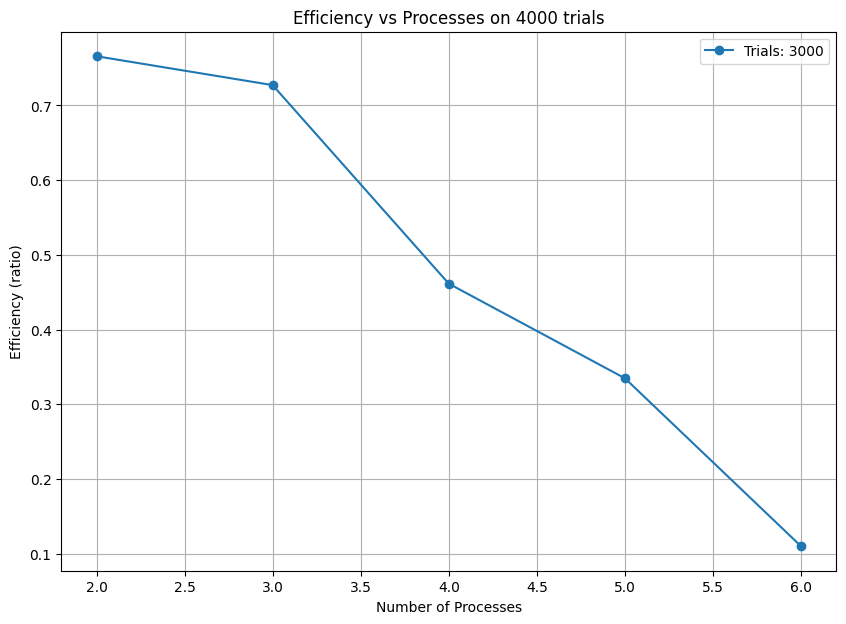

In [ ]:
plt.figure(figsize=(10, 7))
filtered_data = result_mpi[result_mpi['Total_trials'] == 4000]
plt.plot(filtered_data['MPI_processes'] , filtered_data['Efficiency'], marker='o', label=f'Trials: {3000}')
plt.xlabel('Number of Processes')
plt.ylabel('Efficiency (ratio)')
plt.title('Efficiency vs Processes on 4000 trials')
plt.legend()
plt.grid(True)

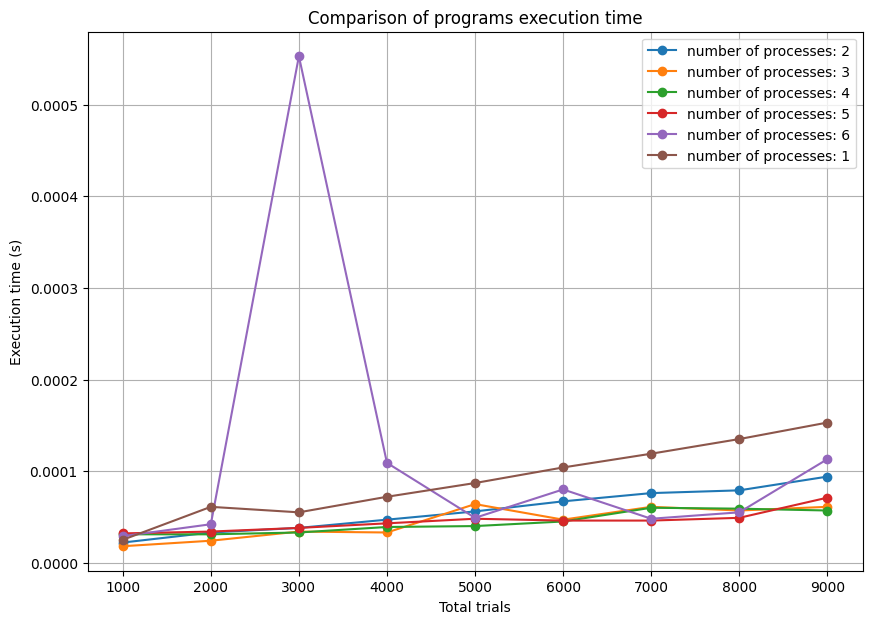

In [ ]:
plt.figure(figsize=(10, 7))
for i in range (2, 7):
  filtered_df = result_mpi[result_mpi['MPI_processes'] == i]
  plt.plot(filtered_df['Total_trials'], filtered_df['Execution_time'], marker='o', label=f'number of processes: {i}')
plt.plot(result_seq['Total_trials'], result_seq['Execution_time'], marker='o', label=f'number of processes: {1}')
plt.xlabel('Total trials')
plt.ylabel('Execution time (s)')
plt.title('Comparison of programs execution time')
plt.legend()
plt.grid(True)

## Задание 2

Сгенерируем матрицы и векторы различного размера для экспериментов.

In [ ]:
import os
import numpy as np

os.makedirs('data', exist_ok=True)

matrix_sizes = [
    (8, 16),
    (16, 32),
    (32, 64),
    (64, 128),
    (128, 256),
    (256, 512),
    (512, 1024),
]

for rows, cols in matrix_sizes:
    matrix = np.random.uniform(1, 11, size=(rows, cols))
    vector = np.arange(1, cols + 1, dtype=float)
    matrix_filename = f"data/matrix_{rows}_{cols}.txt"
    vector_filename = f"data/vector_{cols}.txt"
    np.savetxt(matrix_filename, matrix, fmt='%.4f')
    np.savetxt(vector_filename, vector, fmt='%.4f')


In [ ]:
colwise = pd.read_csv("colwise.csv")
rowwise = pd.read_csv("rowwise.csv")
blockwise = pd.read_csv("blockwise.csv")

In [ ]:
blockwise.head()

,n_rows,n_cols,n_processes,time
0,8,16,1,0.000003
1,8,16,2,0.000004
2,8,16,4,0.000008
3,16,32,1,0.000004
4,16,32,2,0.000006


In [ ]:
rowwise.head()

,n_rows,n_cols,n_processes,time
0,8,16,1,0.000002
1,8,16,2,0.000004
2,8,16,4,0.000005
3,16,32,1,0.000003
4,16,32,2,0.000005


In [ ]:
task_variants = ['rowwise', 'colwise', 'blockwise']

In [ ]:
def calculate_speedup_and_efficiency(data):
  for n_rows in data['n_rows'].unique():
    filtered = data[data['n_rows'] == n_rows]
    seq_time = filtered[filtered[' n_processes'] == 1][' time'].values[0]
    data.loc[data['n_rows'] == n_rows, 'Speedup'] = seq_time / data.loc[data['n_rows'] == n_rows, ' time']

  data['Efficiency'] = data['Speedup']/data[' n_processes']
  return data

In [ ]:
rowwise = calculate_speedup_and_efficiency(rowwise)
colwise = calculate_speedup_and_efficiency(colwise)
blockwise = calculate_speedup_and_efficiency(blockwise)

In [ ]:
rowwise.head()

,n_rows,n_cols,n_processes,time,Speedup,Efficiency
0,8,16,1,0.000002,1.0,1.00
1,8,16,2,0.000004,0.5,0.25
2,8,16,4,0.000005,0.4,0.10
3,16,32,1,0.000003,1.0,1.00
4,16,32,2,0.000005,0.6,0.30


Графики времени выполнения, ускорения и эффективности для rowwise:

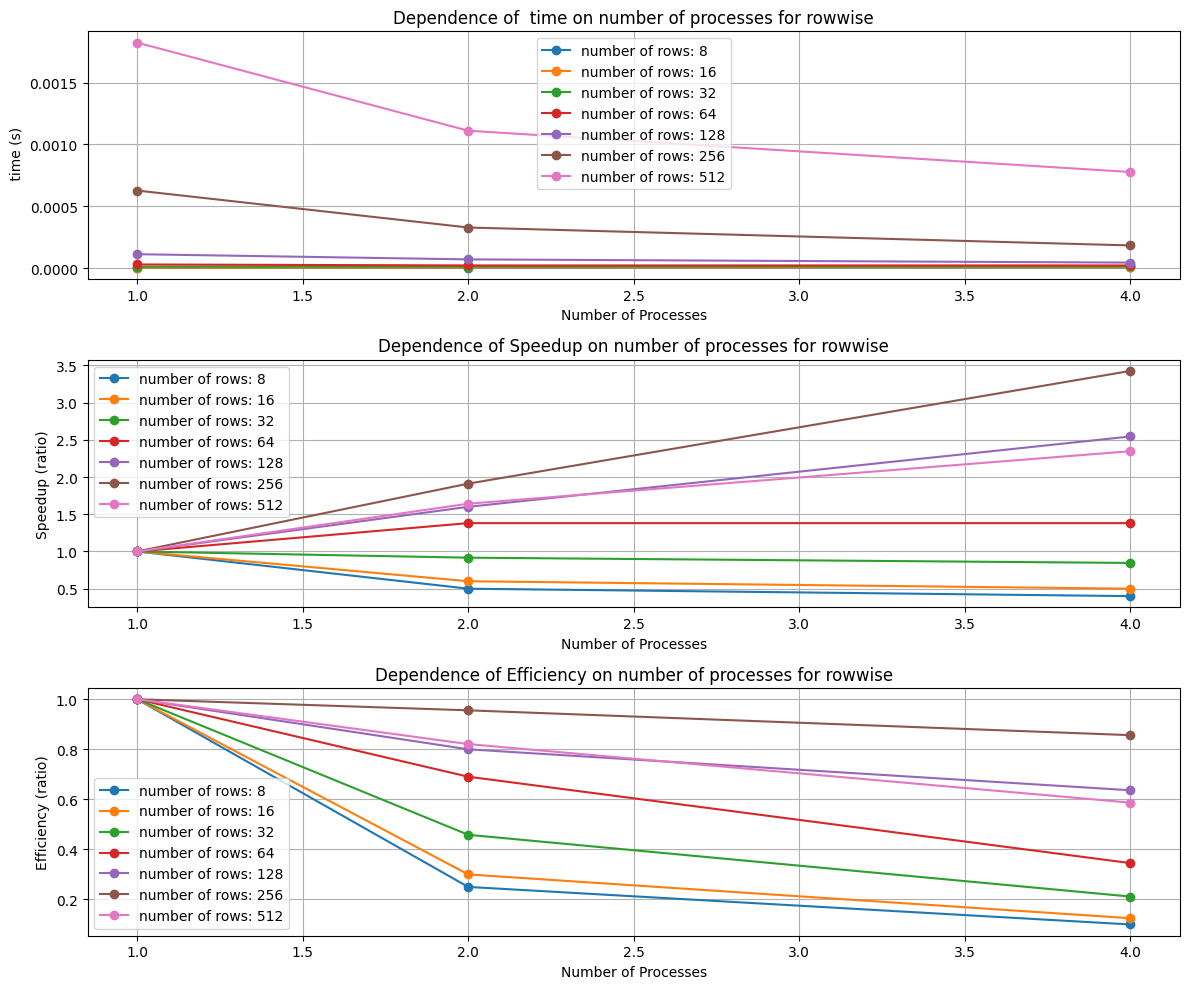

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
n_rows = rowwise['n_rows'].unique()
metrics = [' time', 'Speedup', 'Efficiency']
for t in range(len(metrics)):
  for i in range (len(n_rows)):
    filtered = rowwise[rowwise['n_rows'] == n_rows[i]]
    axes[t].plot(filtered[' n_processes'], filtered[metrics[t]], marker='o', label=f'number of rows: {n_rows[i]}')
    axes[t].set_xlabel('Number of Processes')
    if metrics[t] == ' time':
      axes[t].set_ylabel(f'{metrics[t]} (s)')
    else:
      axes[t].set_ylabel(f'{metrics[t]} (ratio)')
    axes[t].set_title(f'Dependence of {metrics[t]} on number of processes for rowwise')
    axes[t].legend()
    axes[t].grid(True)
plt.tight_layout()
plt.show()

Графики времени выполнения, ускорения и эффективности для colwise:




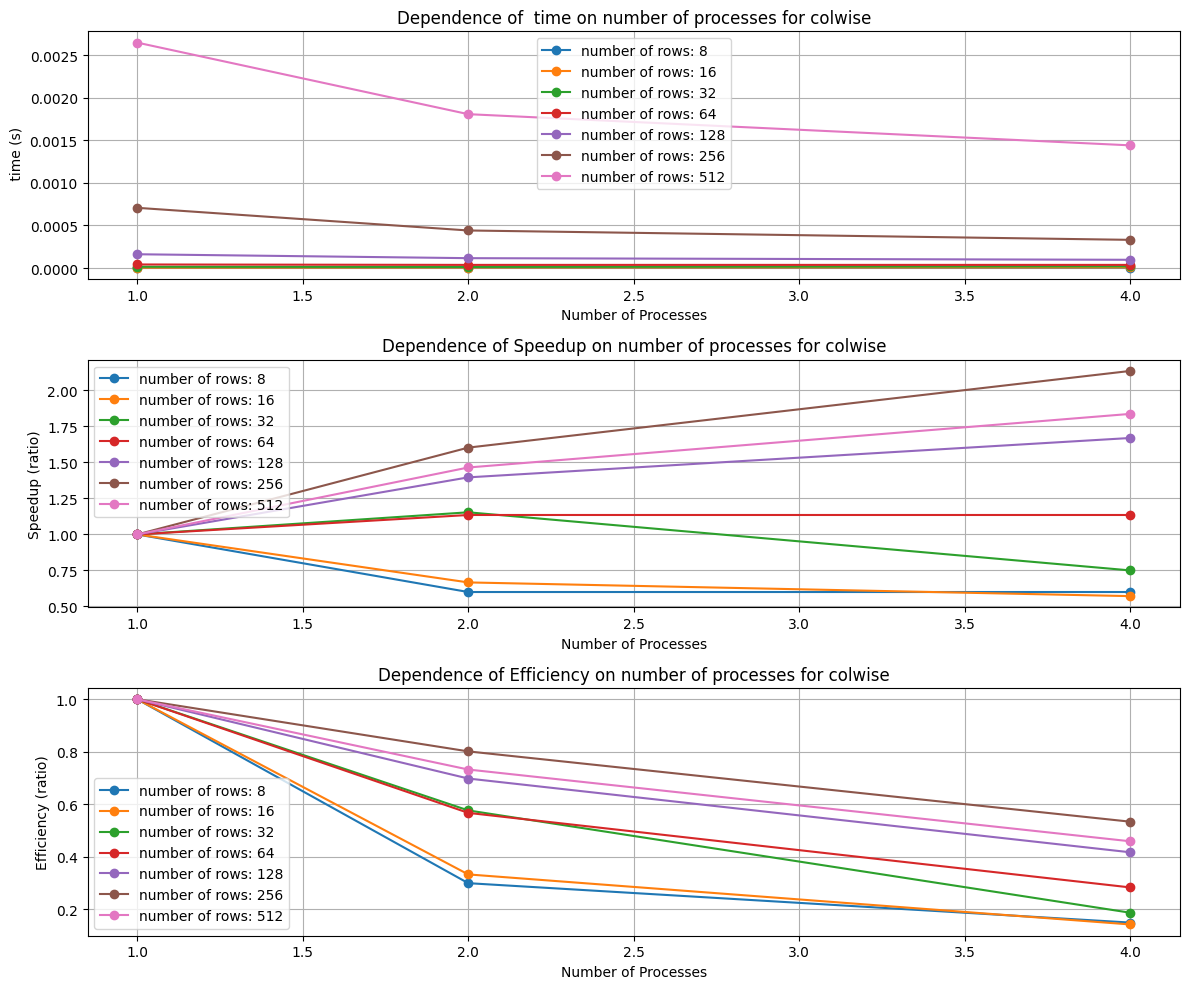

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
n_rows = colwise['n_rows'].unique()
metrics = [' time', 'Speedup', 'Efficiency']
for t in range(len(metrics)):
  for i in range (len(n_rows)):
    filtered = colwise[rowwise['n_rows'] == n_rows[i]]
    axes[t].plot(filtered[' n_processes'], filtered[metrics[t]], marker='o', label=f'number of rows: {n_rows[i]}')
    axes[t].set_xlabel('Number of Processes')
    if metrics[t] == ' time':
      axes[t].set_ylabel(f'{metrics[t]} (s)')
    else:
      axes[t].set_ylabel(f'{metrics[t]} (ratio)')
    axes[t].set_title(f'Dependence of {metrics[t]} on number of processes for colwise')
    axes[t].legend()
    axes[t].grid(True)
plt.tight_layout()
plt.show()

Графики времени выполнения, ускорения и эффективности для blockwise:

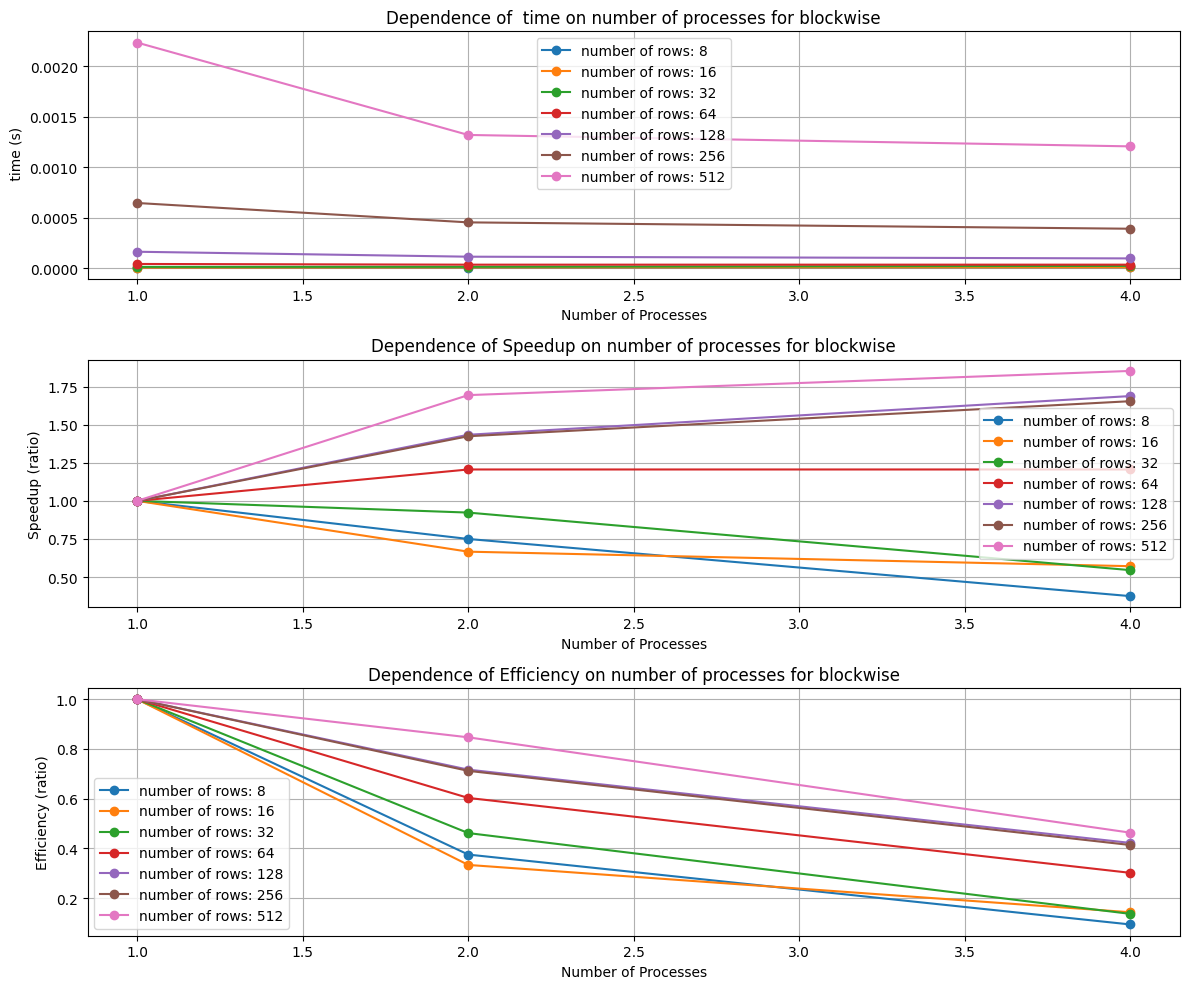

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))
n_rows = blockwise['n_rows'].unique()
metrics = [' time', 'Speedup', 'Efficiency']
for t in range(len(metrics)):
  for i in range (len(n_rows)):
    filtered = blockwise[rowwise['n_rows'] == n_rows[i]]
    axes[t].plot(filtered[' n_processes'], filtered[metrics[t]], marker='o', label=f'number of rows: {n_rows[i]}')
    axes[t].set_xlabel('Number of Processes')
    if metrics[t] == ' time':
      axes[t].set_ylabel(f'{metrics[t]} (s)')
    else:
      axes[t].set_ylabel(f'{metrics[t]} (ratio)')
    axes[t].set_title(f'Dependence of {metrics[t]} on number of processes for blockwise')
    axes[t].legend()
    axes[t].grid(True)
plt.tight_layout()
plt.show()